In [359]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.preprocessing import LabelEncoder

In [360]:
con = sqlite3.connect('dataset/player_attributes.sqlite')
df_player_attributes = pd.read_sql('SELECT * FROM player_attributes', con)
con.close()
df_player_attributes.drop_duplicates(inplace=True)
con = sqlite3.connect('dataset/player.sqlite')
df_player = pd.read_sql('SELECT * FROM player', con)
con.close()
df_player.drop_duplicates(inplace=True)
# df_player_attributes.sample(5)

In [361]:
df_player = df_player.iloc[:, [1, 2, 4, 5, 6]]
df_player.sample(5)

,player_api_id,player_name,birthday,height,weight
14,75489,Aaron Ramsey,1990-12-26 00:00:00,177.80,154
2936,192326,Elohim Rolland,1989-03-03 00:00:00,182.88,170
1004,30266,Artur Wichniarek,1977-02-28 00:00:00,182.88,174
3998,243250,Gregory Mertens,1991-02-02 00:00:00,190.50,172
1286,27415,Bo Svensson,1979-08-04 00:00:00,190.50,192


In [362]:
df_player_attributes_tmp = df_player_attributes.iloc[:, 2:]
df_player_attributes_tmp.drop(df_player_attributes_tmp.columns[[1]], axis=1, inplace=True)
df_player_attributes_tmp.sample(2)

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
45372,33418,80.0,84.0,right,medium,low,42.0,86.0,73.0,67.0,...,61.0,84.0,25.0,23.0,25.0,5.0,7.0,14.0,15.0,15.0
64801,39207,71.0,71.0,right,medium,high,68.0,55.0,86.0,74.0,...,66.0,57.0,68.0,73.0,75.0,9.0,15.0,6.0,13.0,11.0


In [376]:
df = df_player.join(df_player_attributes_tmp.set_index('player_api_id'), on='player_api_id', how='left')
df.sample(5)

,player_api_id,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
10906,181842,Yaya Soumahoro,1989-09-28 00:00:00,175.26,152,73.0,82.0,left,medium,medium,...,68.0,57.0,18.0,26.0,24.0,5.0,15.0,12.0,15.0,7.0
3467,166554,Francesco Migliore,1988-04-17 00:00:00,172.72,165,64.0,70.0,left,high,medium,...,46.0,48.0,60.0,61.0,61.0,12.0,13.0,5.0,15.0,14.0
10021,32830,Steven McGarry,1979-09-28 00:00:00,175.26,172,60.0,65.0,right,medium,medium,...,69.0,57.0,37.0,46.0,44.0,14.0,21.0,49.0,21.0,21.0
4687,241728,Jason Lowe,1991-09-02 00:00:00,177.80,176,64.0,75.0,right,low,high,...,59.0,60.0,68.0,61.0,64.0,6.0,6.0,15.0,11.0,8.0
7083,26155,Mathieu Bodmer,1982-11-22 00:00:00,190.50,198,76.0,76.0,right,medium,medium,...,71.0,76.0,77.0,80.0,68.0,11.0,10.0,14.0,13.0,15.0


In [377]:
df.dropna()
df = df.drop_duplicates(subset=['player_api_id'])
df.shape

(11060, 43)

In [378]:
df['overall_rating'].max()

94.0

In [379]:
df['overall_rating'].min()

42.0

In [380]:
df.loc[df['overall_rating'].idxmax()]

player_api_id                        30981
player_name                   Lionel Messi
birthday               1987-06-24 00:00:00
height                              170.18
weight                                 159
overall_rating                          94
potential                               94
preferred_foot                        left
attacking_work_rate                 medium
defensive_work_rate                    low
crossing                                80
finishing                               93
heading_accuracy                        71
short_passing                           88
volleys                                 85
dribbling                               96
curve                                   89
free_kick_accuracy                      90
long_passing                            79
ball_control                            96
acceleration                            95
sprint_speed                            90
agility                                 92
reactions  

In [381]:
df.iloc[:, 8].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'], dtype=object)

In [385]:
df.columns[8]
df.loc[df.iloc[:, 8]=='norm', df.columns[8]] = 'medium'
df.loc[df.iloc[:, 8]=='_0', df.columns[8]] = 'none'
df.loc[(df.iloc[:, 8]!='low') & (df.iloc[:, 8]!='medium') & (df.iloc[:, 8]!='high'), df.columns[8]] = 'none'
df

,player_api_id,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,76.0,left,high,medium,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163,65.0,67.0,right,medium,medium,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
3,30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198,69.0,69.0,right,medium,medium,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
4,23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154,70.0,70.0,right,medium,medium,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
5,27316,Aaron Hunt,1986-09-04 00:00:00,182.88,161,77.0,77.0,left,medium,medium,...,76.0,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0
6,564793,Aaron Kuhl,1996-01-30 00:00:00,172.72,146,61.0,74.0,right,medium,high,...,61.0,42.0,52.0,58.0,57.0,8.0,13.0,14.0,14.0,15.0
7,30895,Aaron Lennon,1987-04-16 00:00:00,165.10,139,77.0,77.0,right,high,medium,...,73.0,62.0,30.0,34.0,35.0,14.0,7.0,7.0,16.0,11.0
8,528212,Aaron Lennox,1993-02-19 00:00:00,190.50,181,48.0,56.0,right,medium,medium,...,15.0,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0
9,101042,Aaron Meijers,1987-10-28 00:00:00,175.26,170,69.0,69.0,left,medium,medium,...,71.0,56.0,67.0,68.0,65.0,7.0,15.0,7.0,10.0,15.0


In [387]:
df.columns[9]
df.loc[df.iloc[:, 9]=='norm', df.columns[9]] = 'medium'
df.loc[df.iloc[:, 9]=='_0', df.columns[9]] = 'none'
df.loc[(df.iloc[:, 9]!='low') & (df.iloc[:, 9]!='medium') & (df.iloc[:, 9]!='high'), df.columns[9]] = 'none'
df.iloc[:, 9].unique()

array(['medium', 'high', 'none', 'low'], dtype=object)

In [388]:
encoder = LabelEncoder()
df_encoded = df
enc_col = np.array([encoder.fit_transform(df.iloc[:, i]) for i in [7,8,9]]).T
df_encoded.iloc[:, [7,8,9]] = enc_col
df_encoded

,player_api_id,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,71.0,1,2,2,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,76.0,0,0,2,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163,65.0,67.0,1,2,2,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
3,30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198,69.0,69.0,1,2,2,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
4,23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154,70.0,70.0,1,2,2,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
5,27316,Aaron Hunt,1986-09-04 00:00:00,182.88,161,77.0,77.0,0,2,2,...,76.0,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0
6,564793,Aaron Kuhl,1996-01-30 00:00:00,172.72,146,61.0,74.0,1,2,0,...,61.0,42.0,52.0,58.0,57.0,8.0,13.0,14.0,14.0,15.0
7,30895,Aaron Lennon,1987-04-16 00:00:00,165.10,139,77.0,77.0,1,0,2,...,73.0,62.0,30.0,34.0,35.0,14.0,7.0,7.0,16.0,11.0
8,528212,Aaron Lennox,1993-02-19 00:00:00,190.50,181,48.0,56.0,1,2,2,...,15.0,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0
9,101042,Aaron Meijers,1987-10-28 00:00:00,175.26,170,69.0,69.0,0,2,2,...,71.0,56.0,67.0,68.0,65.0,7.0,15.0,7.0,10.0,15.0


In [389]:
df_encoded.to_csv('dataset/df_encoded.csv')

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

height = df_encoded['height']
rating = df_encoded['overall_rating']

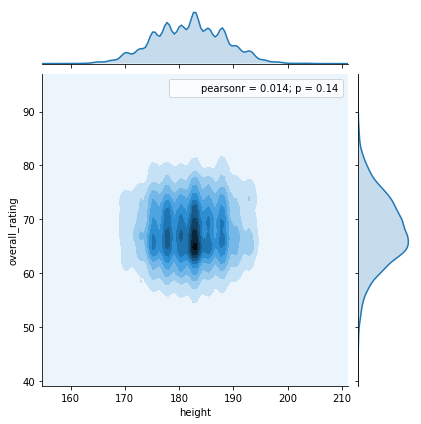

In [403]:
sns.jointplot(x="height", y="overall_rating", data=df_encoded, kind='kde');
plt.show()

In [420]:
import plotly.plotly as py
plotly.tools.set_credentials_file(username='steno87', api_key='b6Kh9ff84Y1vL4rx92Wi')

